Publications by Institution:
郑州大学第一附属医院             19
互联网医疗系统与应用国家工程实验室      19
郑州大学管理工程学院             15
华中科技大学同济医学院医药卫生管理学院     6
扬州大学信息工程学院              5
复旦大学计算机科学技术学院           5
复旦大学公共卫生学院              5
扬州大学广陵学院                5
南方医科大学卫生管理学院            4
中国中医科学院中医临床基础医学研究所      4
Name: count, dtype: int64

Publications by Source:
Source-文献来源
中国卫生事业管理    27
中国医院管理      26
卫生经济研究      15
计算机科学       14
医学与社会       12
中国卫生资源      11
中国医院        11
计算机应用研究     10
医学与哲学       10
中国卫生经济       9
Name: count, dtype: int64


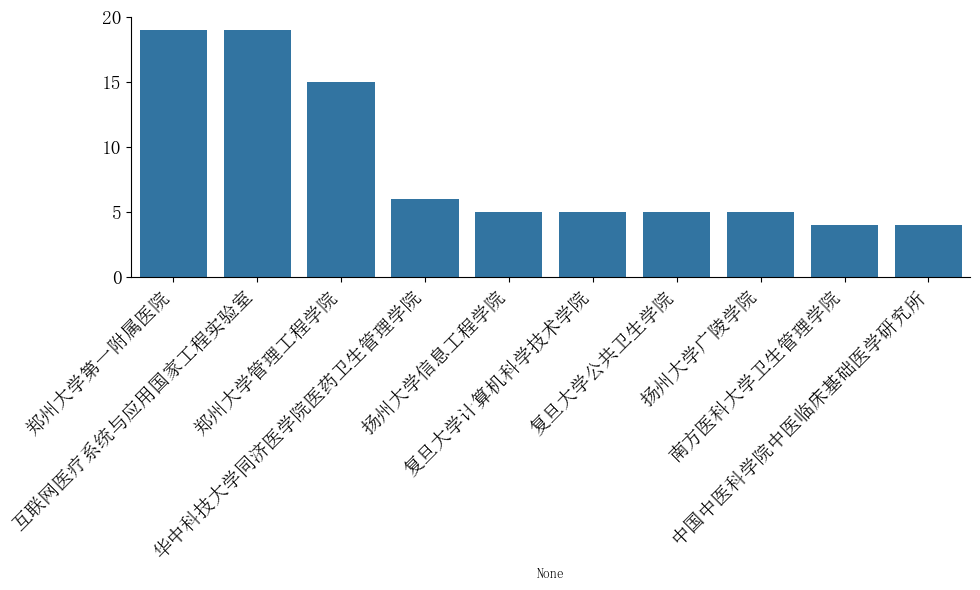

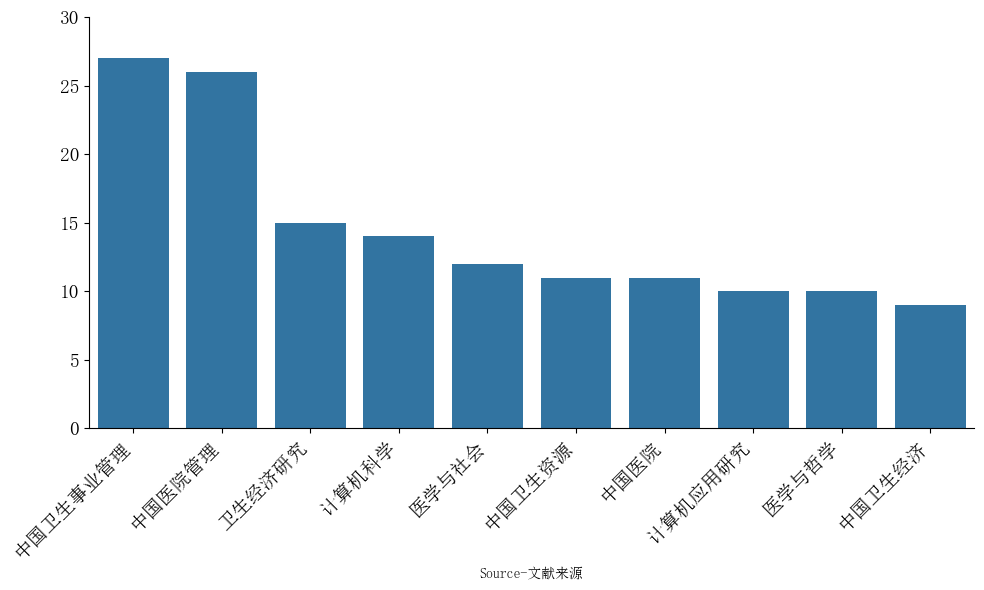

Charts have been saved to the 'static' folder.


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Step 1: 读取数据（假设文件路径为 'med_data_cnki.xls'）
df = pd.read_excel('med_data_cnki.xlsx', sheet_name=0)  # 根据实际情况修改文件路径

# Step 2: 检查数据是否成功读取
#print(df.head())

# Step 3: 拆分单位列（Organ-单位）并统计每个单位的文献数量
all_institutions = df['Organ-单位'].str.split(r'[;·]', expand=True).stack()

# 去除空白（如空字符串或NaN）并统计每个单位的出现次数
all_institutions = all_institutions.str.strip()  # 去除单位名称的前后空格
all_institutions = all_institutions[all_institutions != '']  # 去除空字符串

# 统计每个单位的出现次数，取前10个
institution_counts = all_institutions.value_counts().head(10)
# Step 4: 统计每个文献来源（Source-文献来源）的数量
source_counts = df['Source-文献来源'].value_counts().head(10)

# 输出统计结果
print("Publications by Institution:")
print(institution_counts)

print("\nPublications by Source:")
print(source_counts)

# Step 4: 绘制柱状图（发文单位）
plt.figure(figsize=(10, 6))
sns.barplot(x=institution_counts.index, y=institution_counts.values)
#plt.title('Top 10 Publications by Institution', fontsize=14)
#plt.xlabel('Institution', fontsize=12)
#plt.ylabel('Number of Publications', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.ylim(0, 20)
plt.yticks(range(0, 21, 5),fontsize=14)  # 这里设置了y轴的刻度为0到20，步长为5
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# 保存图片
plt.tight_layout()
plt.savefig('static/publications_by_institution.png')
plt.show()

# Step 5: 绘制柱状图（发文期刊）
plt.figure(figsize=(10, 6))
sns.barplot(x=source_counts.index, y=source_counts.values)
#plt.title('Top 10 Publications by Source', fontsize=14)
#plt.xlabel('Journal', fontsize=12)
#plt.ylabel('Number of Publications', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)
# 去掉上边和右边的框线
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.ylim(bottom=0,top=30)
# 保存图片
plt.tight_layout()
plt.savefig('static/publications_by_source.png')
plt.show()

print("Charts have been saved to the 'static' folder.")


Year-年
2020     99
2021    113
2022    116
2023     94
2024     76
Name: count, dtype: int64


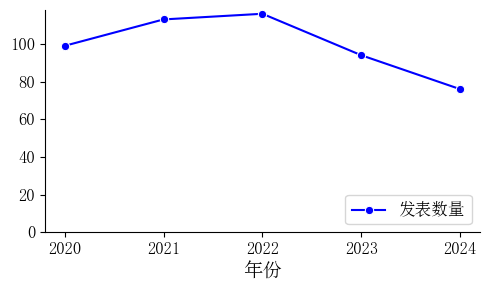

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 假设df已经加载并且包含了'Year-年'这一列
# 过滤掉2025年的数据
df_filtered = df[df['Year-年'] != 2025]

# 统计每年发表的文献数量
publication_counts = df_filtered['Year-年'].value_counts().sort_index()
print(publication_counts)
# 设置字体为宋体，解决中文显示问题
plt.rcParams['font.family'] = 'SimSun'  # 设置字体为宋体

# 绘制折线图并添加图例
plt.figure(figsize=(5, 3))
sns.lineplot(x=publication_counts.index, y=publication_counts.values, marker='o', linestyle='-', color='b', label='Number of Publications')

# 设置学术规范样式
plt.xlabel("Year", fontsize=14)
plt.xticks(publication_counts.index, labels=[str(int(year)) for year in publication_counts.index], fontsize=12)  # 去除小数部分
plt.yticks(fontsize=12)
# 设置y轴从0开始
plt.ylim(bottom=0)

# 去掉上边和右边的框线
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# 显示图例，并将其放在右下角
plt.legend(loc='lower right', fontsize=12)

# 去掉网格线
# plt.grid(True)  # 删除这行以去除网格

plt.tight_layout()
plt.savefig('static/republication.png')
plt.show()


区块链          18
隐私保护         15
数据共享         13
大数据          13
医疗数据         12
医疗数据共享       10
数据安全          9
访问控制          9
人工智能          7
医疗保险          6
健康医疗数据        6
医疗费用          6
健康医疗大数据       6
医疗服务利用        5
智能合约          5
属性基加密         5
电子病历          5
医疗健康          5
智慧医疗          4
老年人           4


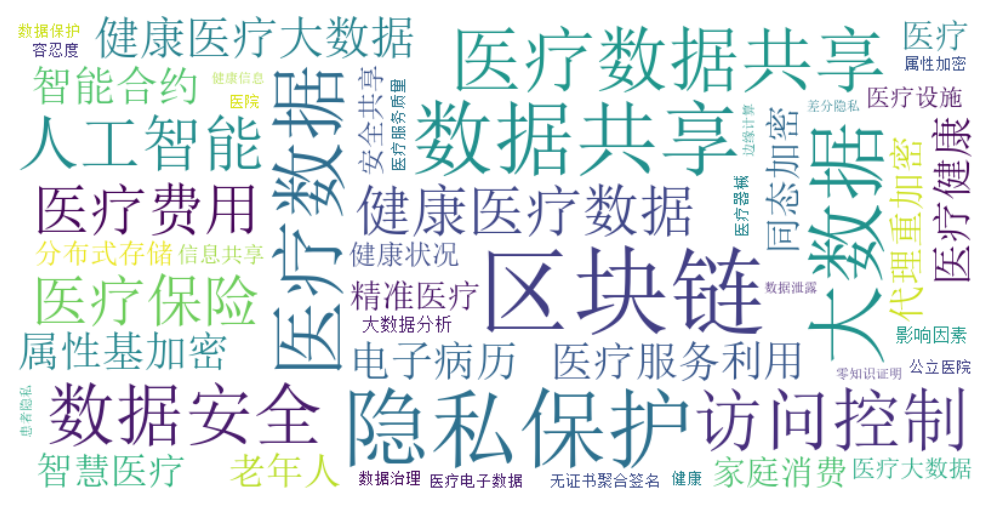

In [10]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import pandas as pd

font_path="C:/Windows/Fonts/simsun.ttc"

# 假设df已经加载，并包含了'Keyword-关键词'这一列
# 合并所有关键词并去掉缺失值
all_keywords = ' '.join(df['Keyword-关键词'].dropna())  # 合并所有关键词

# 对关键词进行分割，使用 `;;` 作为分隔符
keywords_list = all_keywords.split(';;')  # 使用;;作为分隔符


# 统计词频
keyword_counts = Counter([keyword.strip() for keyword in keywords_list if keyword.strip() != ''])  # 清理空白词

# 统计高频词汇
result = Counter(keyword_counts).most_common(200) #词的个数
 
# 建立词汇字典
content = dict(result)
#输出词频统计结果
for i in range(20):
    word,flag=result[i]
    print("{0:<10}{1:>5}".format(word,flag))

# 如果没有有效的关键词，直接返回提示
if len(keyword_counts) == 0:
    print("没有有效的关键词数据。")
else:
    # 创建词云图
    wordcloud = WordCloud(
        width=800,  # 增加画布宽度
        height=400,  # 增加画布高度
        background_color='white',
        max_words=50,
        colormap='viridis',  # 配色方案
        max_font_size=80,  # 限制最大字体大小
        margin=10,  # 减少每个词的间距
        font_path=font_path
    ).generate_from_frequencies(keyword_counts)

    # 绘制词云图
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # 不显示坐标轴
    plt.tight_layout()
    plt.savefig('static/wordcloud.png')
    plt.show()

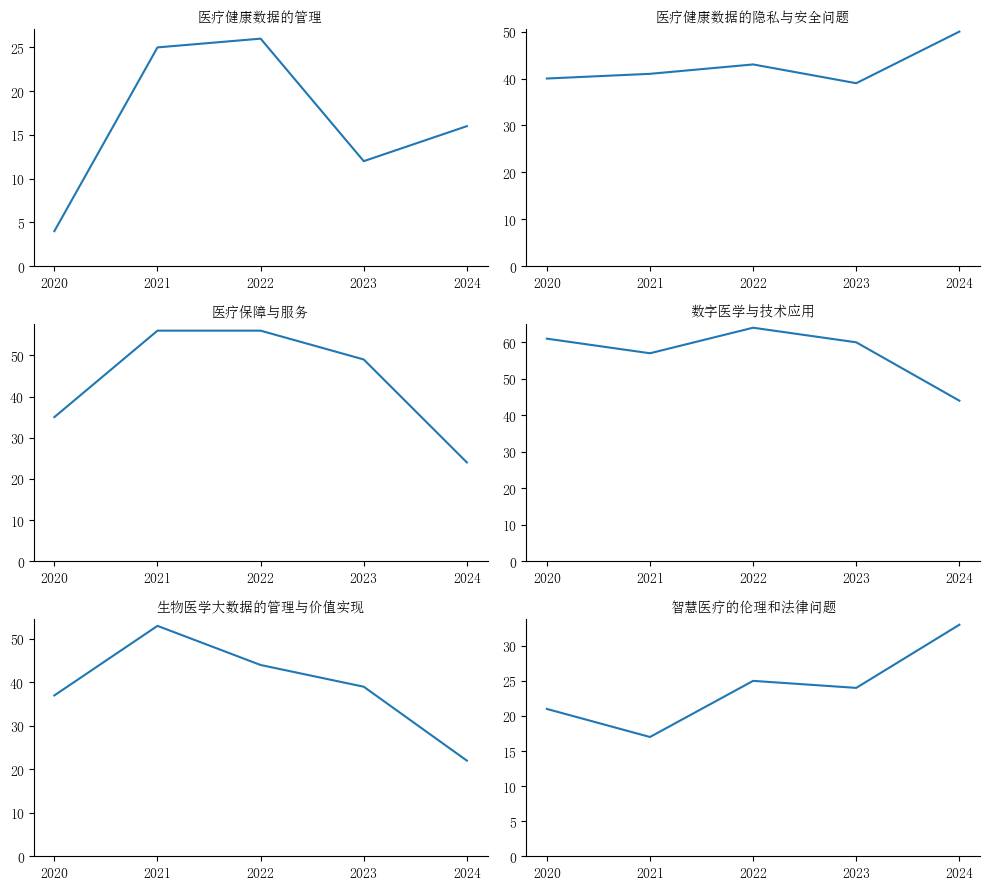

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import MaxNLocator
# 设置中文字体（确保系统中安装了支持中文的字体，Windows通常是 SimHei，Linux上可能是 DejaVu Sans）
plt.rcParams['font.sans-serif'] = ['Simsun']  # Windows平台
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 创建数据
data = {
    '年份': [2020, 2021, 2022, 2023, 2024],
    '医疗健康数据的管理': [4, 25, 26, 12, 16],
    '医疗健康数据的隐私与安全问题': [40, 41, 43, 39, 50],
    '医疗保障与服务': [35, 56, 56, 49, 24],
    '数字医学与技术应用': [61, 57, 64, 60, 44],
    '生物医学大数据的管理与价值实现': [37, 53, 44, 39, 22],
    '智慧医疗的伦理和法律问题': [21, 17, 25, 24, 33]
}

# 转换为DataFrame
df = pd.DataFrame(data)

# 创建一个3行2列的子图布局，图形大小为 (10, 9)，确保每个子图大小为 (5, 3)
fig, axes = plt.subplots(3, 2, figsize=(10, 9))

# 展开子图数组，方便遍历
axes = axes.flatten()

# 设置每个图的标题和字体大小
for i, column in enumerate(df.columns[1:]):  # 跳过第一列'年份'
    ax = axes[i]
    ax.plot(df['年份'], df[column], label=column)
    ax.set_title(f"{column}", fontsize=10)
    #ax.set_xlabel("年份", fontsize=10)
    #ax.set_ylabel("文档数量", fontsize=10)
    ax.tick_params(axis='both', which='major', labelsize=10)
    # 设置y轴从0开始
    ax.set_ylim(bottom=0)
    
    # 确保年份为整数
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    # 去掉上边框和下边框
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # 添加图例
    #ax.legend("文档数量",fontsize=8)

# 调整布局，避免子图重叠
plt.tight_layout()

# 保存图像到指定路径
plt.savefig('static/trend.png')

# 显示图形
plt.show()

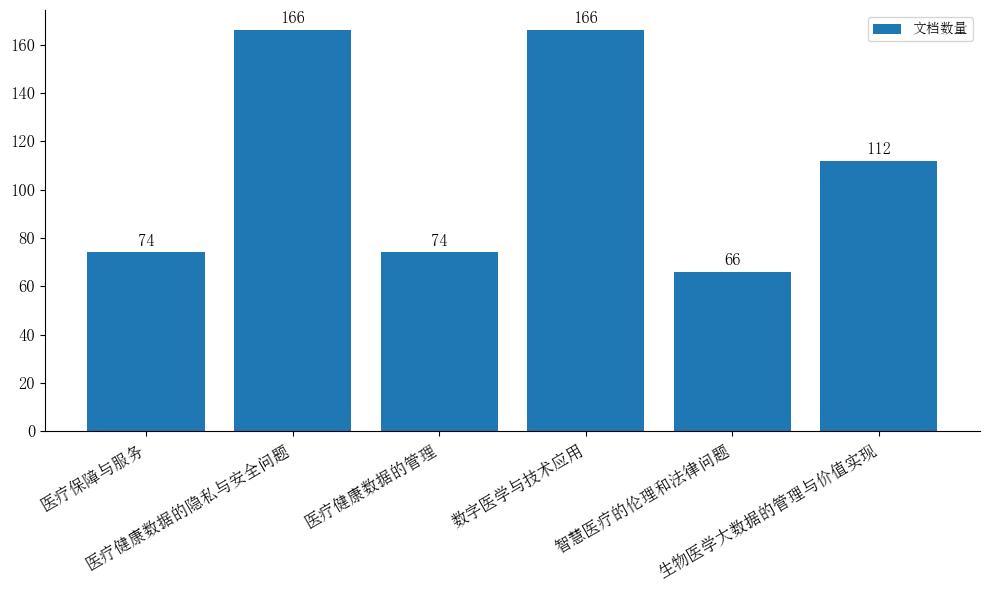

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# 设置中文字体为宋体，确保系统支持该字体
plt.rcParams['font.sans-serif'] = ['SimSun']  # 中文宋体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 数据
themes = ['医疗保障与服务', '医疗健康数据的隐私与安全问题', '医疗健康数据的管理', 
          '数字医学与技术应用', '智慧医疗的伦理和法律问题', '生物医学大数据的管理与价值实现']
counts = [74, 166, 74, 166, 66, 112]

# 绘制柱状图
fig, ax = plt.subplots(figsize=(10, 6))  # 设置画布大小
bars = ax.bar(themes, counts)

# 设置标题和标签
#ax.set_title('各一级主题的文档数量分布', fontsize=12)
#ax.set_xlabel('一级主题', fontsize=10)
#ax.set_ylabel('文档数量', fontsize=10)

# 显示每根柱子的数量
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 2, int(yval), ha='center', va='bottom', fontsize=12)

# 去掉上边框和右边框
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# 设置y轴从0开始
ax.set_ylim(bottom=0)

# 显示图例
ax.legend(['文档数量'], fontsize=10)

# 调整x轴标签的显示角度，以避免重叠
plt.xticks(rotation=30, ha='right', fontsize=12)
plt.yticks(fontsize=12)
# 调整布局，避免标签和标题重叠
plt.tight_layout()

# 保存图像
plt.savefig('static/bar_chart.png', dpi=300)

# 显示图像
plt.show()